In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('SensorReadings2025.csv', delimiter=';')

/Users/davidkolet-tassara/Documents/GitHubRepo/AirQualityAnalysis/.venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


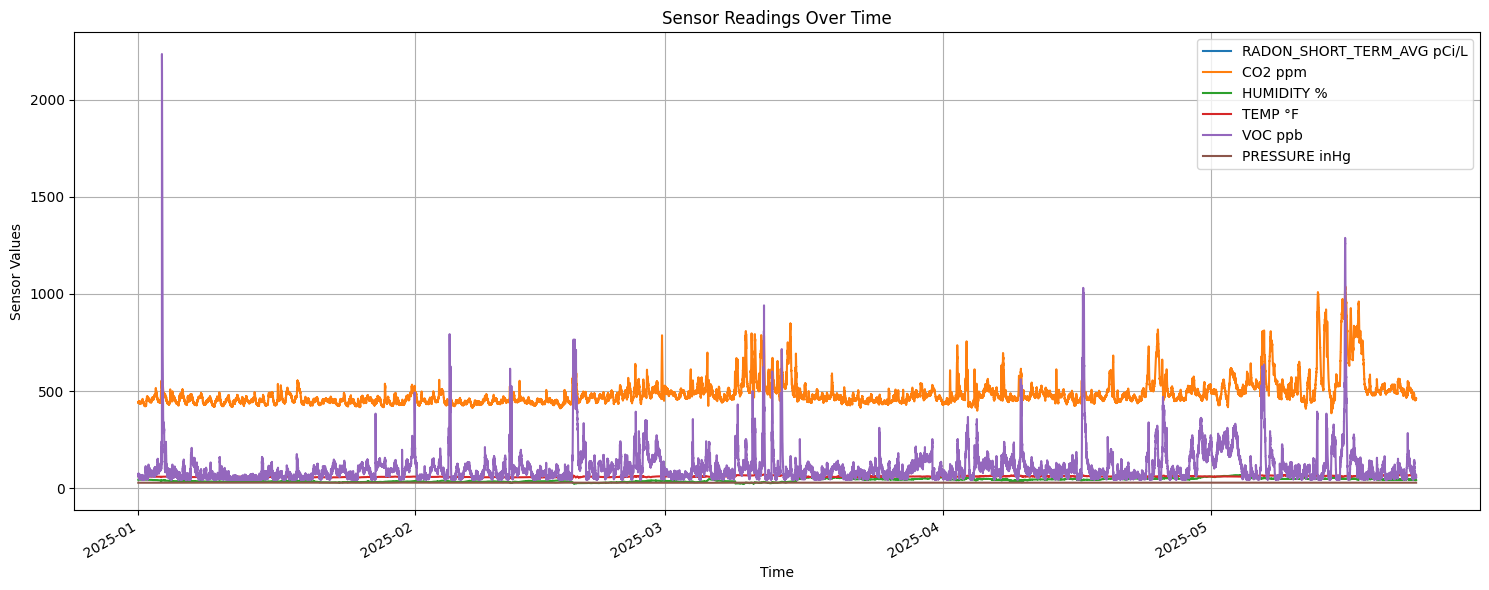

In [5]:
# Convert timestamps with mixed ISO 8601 formats
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='mixed', errors='coerce')

# Drop any rows where datetime conversion failed
df = df.dropna(subset=[df.columns[0]])

# Set the datetime column as the index
df = df.set_index(df.columns[0])

# Plot all columns as line plots
df.plot(figsize=(15, 6), title='Sensor Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.grid(True)
plt.tight_layout()
plt.show() 

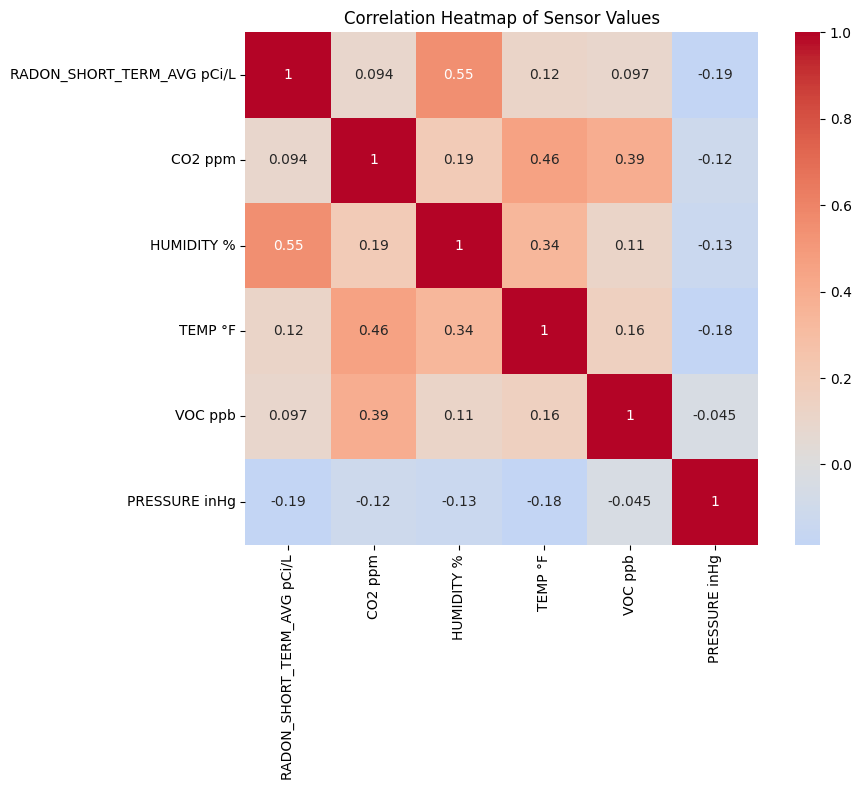

In [6]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap of Sensor Values')
plt.tight_layout()
plt.show()